# Reports on Participants Demographics

Date: April 19, 2019 
Author: Shabnam Haghzare
The following code reports on the number of participants screened- included and gemographics

__Extremely useful resource for power analysis:__
https://rpsychologist.com/d3/NHST/

In [79]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [80]:
# Initialization
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import matplotlib.table as tbl
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 10})
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot

__The folwoing will read the dmographics excel sheet and reports the follwong__

* demographics- Age and Years of Education
* Vision: ETDRS: OD & OS
* Cognition: MoCA
* Mood Status

** To be added: p-value of each with acceptance scores on the right

## Reading the Excel Sheets

In [81]:
# setting the path to the qualitative data master list
Qualitative_Path = ("N:\Shabnam Haghzare\\01- AV_OA_Study\\Master_Data_List\\Qualitative\\")

# reading the demographic data into a dataframe--- index = participant ID, colums = feature label
Demographics = pd.read_excel(Qualitative_Path + "Demographics.xlsx", sheet_name = "Master Data")
Demographics = Demographics.set_index('Participant ID')


In [82]:
type(Demographics)

pandas.core.frame.DataFrame

In [83]:
Demographics.head()

,Date,Participant Status,Manual/Auto Order,Participant Condition Order,Participant Group Order,Participant Completion Order,Age,Sex,Handedness,Highest Level of Education,...,Concentration/Attention Problems,Memory Problems,Difficulty Finding Words,Fallen in the last year,Near Falls Last Year,Fearful of Falling,MoCA Score,Visual Acuity Score (LogMAR)_Right,Visual Acuity Score (LogMAR)_Left,Total Mood Disturbance
Participant ID,,,,,,,,,,,,,,,,,,,,,
1.0,NaT,Did not Come In,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8
2.0,2019-12-07,Exp Incomplete,MA,RTB (4),"PM,PA,RM,RA,TM,TA,BM,BA","PM,PA,RM,RA,TM,TA",75.0,F,Right,Undergraduate,...,No,No,No,No,No,No,27.0,0.243038,0.243038,-30
3.0,NaT,Did not Come In,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8
4.0,2019-01-25,All Completed,MA,RTB (4),"PM,PA,RM,RA,TM,TA,BM,BA","PM,PA,RM,RA,TM,TA,BM,BA",66.0,F,Right,Professional,...,No,No,No,No,No,No,27.0,0.161368,0.079181,-32
5.0,2019-02-01,Exp Incomplete,AM,RTB (4),"PM,PA,RA,RM,TA,TM,BA,BM","PM,PA,RA,RM",75.0,M,Right,Professional,...,No,No,Yes,No,Yes,Yes,26.0,NaN,NaN,-14


# 1. Demographics

## 1.1 Plotting the table on current recruitment status

In [84]:
status = Demographics.groupby('Participant Status')
status.groups

{'All Completed': Float64Index([4.0, 7.0, 9.0], dtype='float64', name='Participant ID'),
 'Did not Come In': Float64Index([1.0, 3.0, 8.0, 35.0], dtype='float64', name='Participant ID'),
 'Exp Incomplete': Float64Index([2.0, 5.0, 6.0, 10.0, 11.0, 12.0, 14.0, 15.0, 16.0, 18.0, 24.0], dtype='float64', name='Participant ID'),
 'Practice Completed': Float64Index([19.0, 20.0, 21.0, 22.0, 23.0, 25.0, 26.0, 28.0, 29.0], dtype='float64', name='Participant ID')}

In [85]:
completed_IDs = np.array(status.groups['All Completed'])
ss_incompleted_IDs = np.array(status.groups['Exp Incomplete'])
excluded_IDs = np.array(status.groups['Did not Come In'])
practiceDone_IDs = np.array(status.groups['Practice Completed']) #only relevant in the third (Two session) design 

## Those who are going to be analysed are complted and completed-RNs
#Analyzed_IDs = np.sort(np.concatenate((completed_IDs, ss_incompleted_IDs)))

In [86]:
# Below choose which one of the participants is going to be analyzed
Analyzed_IDs = np.sort(completed_IDs)
complete_incomplete_IDs = np.sort(np.concatenate((completed_IDs, ss_incompleted_IDs)))

In [87]:
Analyzed_IDs

array([4., 7., 9.])

In [88]:
list((status.groups.keys()))

['All Completed', 'Did not Come In', 'Exp Incomplete', 'Practice Completed']

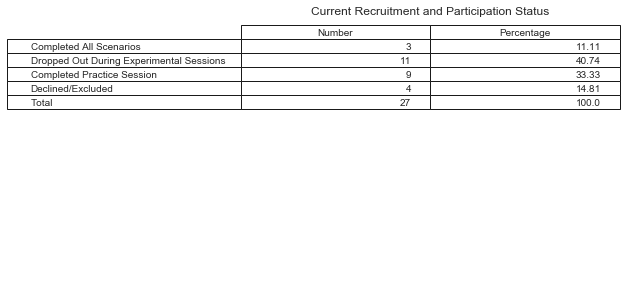

In [89]:
Total = np.sum([np.count_nonzero(completed_IDs)
        ,np.count_nonzero(ss_incompleted_IDs)
        ,np.count_nonzero(practiceDone_IDs)
        ,np.count_nonzero(excluded_IDs)])

participant_counter = [[np.count_nonzero(completed_IDs), (np.count_nonzero(completed_IDs)/Total*100).round(2)]
        ,[np.count_nonzero(ss_incompleted_IDs), (np.count_nonzero(ss_incompleted_IDs)/Total*100).round(2)]
        ,[np.count_nonzero(practiceDone_IDs),(np.count_nonzero(practiceDone_IDs)/Total*100).round(2)]
        ,[np.count_nonzero(excluded_IDs), (np.count_nonzero(excluded_IDs)/Total*100).round(2) ]
        ,[Total, Total/Total*100]]

status_keys = ["Completed All Scenarios", "Dropped Out During Experimental Sessions"
               ,"Completed Practice Session", "Declined/Excluded", "Total"]


fig, ax = plt.subplots()

# hide axes

ax.axis('off')
ax.axis('tight')

ax.table(cellText=participant_counter,
        rowLabels=status_keys,
        colLabels = ["Number", "Percentage"],
        loc='upper center')
        
fig.tight_layout()

plt.title('Current Recruitment and Participation Status')
plt.show()


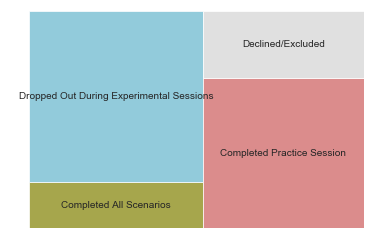

In [90]:
import squarify    # pip install squarify (algorithm for treemap)
 
participant_counter = [np.count_nonzero(completed_IDs)
        ,np.count_nonzero(ss_incompleted_IDs)
        ,np.count_nonzero(practiceDone_IDs)
        ,np.count_nonzero(excluded_IDs)]

        
# If you have 2 lists
squarify.plot(sizes=participant_counter, label= status_keys[0:-1],color=["olive","c", "indianred", "lightgrey"]
              , alpha=.7)
plt.axis('off')
plt.show()


### 1.2 Plotting the Demographics 

**From here on we will only look into participants who completed everything or completed-RN.**

The code below reports demographics of participants in "Analyzed_IDs" 

* demographics- Age and Years of Education
* Vision: ETDRS: OD & OS
* Cognition: MoCA


** To do: report the four above items in a Table.

In [91]:
Analyzed_IDs

array([4., 7., 9.])

In [92]:
type(Demographics)

pandas.core.frame.DataFrame

In [93]:
Analyzed_demographics = Demographics.loc[Analyzed_IDs]

In [94]:
Analyzed_demographics.loc[:, 'Highest Level of Education'].nunique

<bound method IndexOpsMixin.nunique of Participant ID
4.0     Professional
7.0    Undergraduate
9.0         Graduate
Name: Highest Level of Education, dtype: object>

Text(0.5, 1.0, 'Histogram of Age')

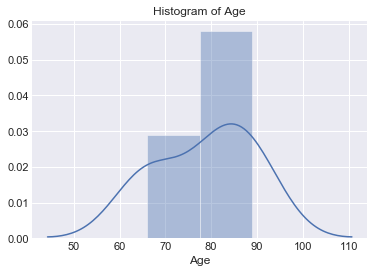

In [95]:
sns.distplot(Analyzed_demographics['Age'])
plt.title('Histogram of Age')

(0.7500000596046448, -9.106917104872991e-07)

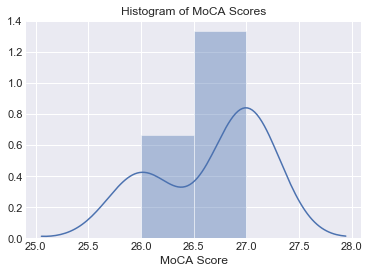

In [98]:

sns.distplot(Analyzed_demographics['MoCA Score'])
plt.title('Histogram of MoCA Scores')
stats.shapiro(Analyzed_demographics['MoCA Score'])

Text(0.5, 1.0, 'Years of Driving Experience')

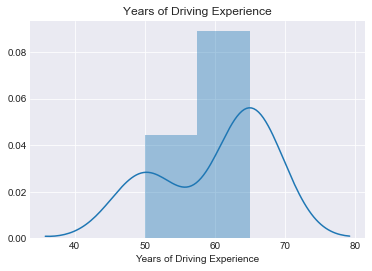

In [19]:
Analyzed_demographics.loc[:,'Years of Driving Experience']= Analyzed_demographics.loc[:,'Years of Driving Experience'].astype(float)
sns.distplot(Analyzed_demographics['Years of Driving Experience'])
plt.title('Years of Driving Experience')

In [20]:
Analyzed_demographics.mean()

Age                                   78.666667
Years of Driving Experience           60.000000
MoCA Score                            26.666667
Visual Acuity Score (LogMAR)_Right     0.255018
Visual Acuity Score (LogMAR)_Left      0.214813
Total Mood Disturbance               -27.666667
dtype: float64

In [21]:
Analyzed_demographics.std()

Age                                   11.676187
Years of Driving Experience            8.660254
MoCA Score                             0.577350
Visual Acuity Score (LogMAR)_Right     0.090689
Visual Acuity Score (LogMAR)_Left      0.123953
Total Mood Disturbance                 3.785939
dtype: float64

# 2. POMS Scores

The following code will read the POMS scores of Analyzed_ID participants.

1. Compute the t-score with the following formula
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/t-distribution/t-score-formula/

Step 1, calculate z-score:
$$ Z = \frac{RawScore - \mu}{\sigma} $$

Step 2, calculate t-score from z-score:
$$ T = (Z x 10) + 50 $$


**Note:** The higher the POMS total, the lower is the mood.

In [22]:
# Reading the mood scores of complete & Incomplete participants

# setting the path to the qualitative data master list
Qualitative_Path = ("N:\Shabnam Haghzare\\01- AV_OA_Study\\Master_Data_List\\Qualitative\\")

# reading the demographic data into a dataframe--- index = participant ID, colums = feature label
POMS = pd.read_excel(Qualitative_Path + "Demographics.xlsx", sheet_name = "POMS Scoring Key")
POMS = POMS.set_index('Participant ID')

complete_and_incmoplete_IDs = np.sort(np.concatenate((completed_IDs, ss_incompleted_IDs)))
CIC_POMS = POMS.loc[complete_and_incmoplete_IDs]

Analyzed_POMS = POMS.loc[Analyzed_IDs]

In [23]:
CIC_POMS

,Tension Score,Anger Score,Fatigue Score,Depression Score,Esteem-related affect Score,Vigor Score,Confusion Score,Total Mood Disturbance
Participant ID,,,,,,,,
2,0.0,0.0,2,0,19,14,1,-30
4,0.0,0.0,0,0,17,15,0,-32
5,3.0,0.0,8,1,17,13,4,-14
6,3.0,0.0,5,0,16,9,8,-9
7,2.0,1.0,0,0,19,12,2,-26
9,0.0,0.0,0,0,17,8,0,-25
10,7.0,1.0,2,3,20,18,2,-23
11,0.0,0.0,0,0,18,10,0,-28
12,1.0,0.0,0,0,16,10,1,-24


## 2.1 Computing POMS t-score

In [24]:
# compute the t-score over 7 different scales nad the total scale

def scale_stats(df, ScaleString):
    mu    = df.loc[:,ScaleString].mean()
    sigma = df.loc[:,ScaleString].std()
    tscores = 50 + 10 * (df.loc[:,ScaleString]-mu) / sigma
    return mu, sigma, tscores

TEN_mean, TEN_std, TEN_tscores = scale_stats(CIC_POMS, 'Tension Score')
ANG_mean, ANG_std, ANG_tscores = scale_stats(CIC_POMS, 'Anger Score')
FAT_mean, FAT_std, FAT_tscores = scale_stats(CIC_POMS, 'Fatigue Score')
DEP_mean, DEP_std, DEP_tscores = scale_stats(CIC_POMS, 'Depression Score')
ERA_mean, ERA_std, ERA_tscores = scale_stats(CIC_POMS, 'Esteem-related affect Score')
VIG_mean, VIG_std, VIG_tscores = scale_stats(CIC_POMS, 'Vigor Score')
CON_mean, CON_std, CON_tscores = scale_stats(CIC_POMS, 'Confusion Score')
TOT_mean, TOT_std, TOT_tscores = scale_stats(CIC_POMS, 'Total Mood Disturbance')

POMS_tscores_CIC = pd.concat([TEN_tscores, ANG_tscores, FAT_tscores, DEP_tscores, ERA_tscores, VIG_tscores
                                             , CON_tscores, TOT_tscores], axis = 1)

In [25]:
POMS_tscores_CIC

,Tension Score,Anger Score,Fatigue Score,Depression Score,Esteem-related affect Score,Vigor Score,Confusion Score,Total Mood Disturbance
Participant ID,,,,,,,,
2,41.572665,46.066021,49.243683,44.360816,58.461719,54.580731,45.163709,38.987153
4,41.572665,46.066021,42.184725,44.360816,43.653711,57.369002,41.778306,36.233941
5,50.887088,46.066021,70.420556,52.255673,43.653711,51.792460,55.319920,61.012847
6,50.887088,46.066021,59.832120,44.360816,36.249707,40.639376,68.861534,67.895876
7,47.782280,73.603874,42.184725,44.360816,58.461719,49.004189,48.549113,44.493577
9,41.572665,46.066021,42.184725,44.360816,43.653711,37.851105,41.778306,45.870182
10,63.306318,73.603874,49.243683,68.045387,65.865723,65.733815,48.549113,48.623394
11,41.572665,46.066021,42.184725,44.360816,51.057715,43.427647,41.778306,41.740365
12,44.677473,46.066021,42.184725,44.360816,36.249707,43.427647,45.163709,47.246788


Text(0.5, 1.0, 'Histogram of Normalized Total Mood Disturbance')

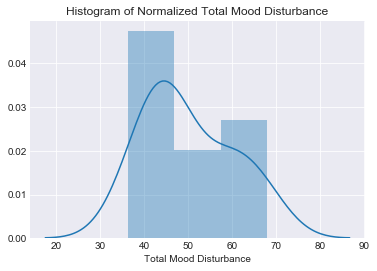

In [26]:
sns.distplot(POMS_tscores_CIC['Total Mood Disturbance'])
plt.title('Histogram of Normalized Total Mood Disturbance')

### 3. Analyzing the Acceptability Scores

In the following code:

3.1 Internal Validity with Cronbach’s Alpha; with alpha > 0.7 criteria recommended by Nunnally (1978)
3.2 The acceptability scores will be corrected by deleting the items resultig in low internal consistency.
3.3 Correlation analyses were conducted including all of the variables to check for multicollinearity

__!Note: Under PC scale/dangerous item is reversed after reading the data.__

In [27]:
# Reading the acceptability scores of Analyzed IDs

# setting the path to the qualitative data master list
Qualitative_Path = ("N:\Shabnam Haghzare\\01- AV_OA_Study\\Master_Data_List\\Qualitative\\")

def read_acc_questionnaire(excel, worksheet):
    df = pd.read_excel(Qualitative_Path + excel + ".xlsx", sheet_name = worksheet)
    df.columns = df.loc[0,:]
    df.drop(index = 0)
    df = df.set_index('Participant ID')
    df = df.drop(index = 'Participant ID')
    
    ## Looking only into the ones picked for analysis
    Analyzed_IDs_2 = np.sort(np.concatenate((completed_IDs, ss_incompleted_IDs)))
    Analyzed_df = df.loc[Analyzed_IDs_2].dropna()
    
    return df, Analyzed_df

# reading the acceptance masterlist into a dataframe--- index = participant ID, colums = feature label
ACC_master, Analyzed_ACC_master = read_acc_questionnaire("AcceptabilityQuestionnaires", "Acceptability_MasterList")

# Pre-exposure acceptability questionnaire
ACC_PRE, Analyzed_ACC_PRE       = read_acc_questionnaire("AcceptabilityQuestionnaires", "PRE")

# Post exposure acceptability questionnaire
ACC_POST, Analyzed_ACC_POST     = read_acc_questionnaire("AcceptabilityQuestionnaires", "POST")

# Rain acceptability questionnaire - and inversing one item in the percieved safety scale
ACC_Rain, Analyzed_ACC_Rain     = read_acc_questionnaire("AcceptabilityQuestionnaires", "Acceptability_Rain")
Analyzed_ACC_Rain['dangerous'] = list(8 - Analyzed_ACC_Rain['dangerous'])
ACC_Rain['dangerous'] = list(8 - ACC_Rain['dangerous'])

# Normal questionnaire - and inversing one item in the percieved safety scale
ACC_Norm, Analyzed_ACC_Norm      = read_acc_questionnaire("AcceptabilityQuestionnaires", "Acceptability_Normal")
Analyzed_ACC_Norm['dangerous'] = list(8 - Analyzed_ACC_Norm['dangerous'])
ACC_Norm['dangerous'] = list(8 - ACC_Norm['dangerous'])

# Traffic questionnaire - and inversing one item in the percieved safety scale
ACC_Trfc, Analyzed_ACC_Traffic     = read_acc_questionnaire("AcceptabilityQuestionnaires", "Acceptability_Traffic")
Analyzed_ACC_Traffic['dangerous'] = list(8 - Analyzed_ACC_Traffic['dangerous'])
ACC_Trfc['dangerous'] = list(8 - ACC_Trfc['dangerous'])

C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  from ipykernel import kernelapp as app


In [28]:
Analyzed_ACC_Rain

,Date,Status,quickly,Cost efficiently,Safely,Easy to Use,Clear & Understandable,Easy to learn,Proud to show,Widely Used,...,plan to obtain,dangerous,feel safe,trust,Drive More often,More comfortable,Waiting for AV failure,AV consider to be mobility assistance,AV than others driving me,AV than accessibility transport
Participant ID,,,,,,,,,,,,,,,,,,,,,
2.0,2018-12-07 00:00:00,Completed,2,4,4,5,6,6,7,6,...,4,3,6,6,4,5,4,5,3,3
4.0,2019-01-25 00:00:00,Completed,4,6,6,7,7,6,4,6,...,1,6,5,5,3,5,4,5,7,7
5.0,2019-02-01 00:00:00,Completed,1,4,3,6,6,6,5,4,...,5,6,3,5,4,5,6,3,7,7
7.0,2019-03-15 00:00:00,Completed,7,4,6,7,7,7,7,4,...,7,6,6,6,2,4,5,7,7,7
9.0,2019-03-21 00:00:00,Completed,5,4,5,6,6,6,5,6,...,4,3,3,2,5,4,2,6,5,3
11.0,2019-04-02 00:00:00,Completed,3,4,4,5,4,5,4,5,...,1,4,3,3,2,2,3,4,3,4
15.0,2019-04-01 00:00:00,Completed,6,6,5,6,6,7,6,6,...,6,6,6,5,6,2,2,4,6,6
16.0,2019-04-12 00:00:00,Completed,4,3,2,2,2,4,2,2,...,1,1,1,1,1,1,6,1,2,1
18.0,2019-04-01 00:00:00,Completed,1,3,1,2,2,3,1,1,...,1,2,2,3,1,2,7,1,1,1


## 3.1 ACC Factors Internal Consistency

Cronbach’s Alpha is calculated using the following formula:
https://data.library.virginia.edu/using-and-interpreting-cronbachs-alpha/

$$ \alpha = (\frac{K}{K-1})(1- \frac{\sum_{i=1}^{k}{\sigma^2_{y_i}} }{\sigma^2_x}) $$

In [29]:
def cronbach_alpha(items):
    items = pd.DataFrame(items)
    items_count = items.shape[1]
    variance_sum = float(items.var(axis=0, ddof=1).sum())
    total_var = float(items.sum(axis=1).var(ddof=1))
    
    return (items_count / float(items_count - 1) *
            (1 - variance_sum / total_var))

# Below is a list of question for each scale
PE_scale_items = ['quickly','Cost efficiently','Safely']
EE_scale_items = ['Easy to Use','Clear & Understandable','Easy to learn']
SI_scale_items = ['Proud to show','Widely Used','Passengers']
FC_scale_items = ['Control Over the Journey','Knowledge Necessary','Infrastructure']
AT_scale_items = ['Good idea','More Interesting','Fun']
SE_scale_items = ['Built-in assistance','no assistance','help of a person']
AN_scale_items = ['Concerns','Frightening',"don't understand"]
IU_scale_items = ['Predict to use','plan to obtain']
PC_scale_items = ['dangerous','feel safe','trust']

### Method-2 Works!-- Each ACC questionnaire from any condition and any participant in incldued and treated as one pobservation

In [30]:
## Now we will concat the traffic, rain and norm acceptability scales to get an alpha for all observations (two from each person)


PE_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, PE_scale_items], Analyzed_ACC_Rain.loc[:, PE_scale_items], 
                    Analyzed_ACC_Traffic.loc[:, PE_scale_items]])
                   
EE_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, EE_scale_items], Analyzed_ACC_Rain.loc[:, EE_scale_items],
                    Analyzed_ACC_Traffic.loc[:, EE_scale_items]]) 
                   
SI_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, SI_scale_items], Analyzed_ACC_Rain.loc[:, SI_scale_items],
                    Analyzed_ACC_Traffic.loc[:, SI_scale_items]])   
                   
FC_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, FC_scale_items], Analyzed_ACC_Rain.loc[:, FC_scale_items],
                   Analyzed_ACC_Traffic.loc[:, FC_scale_items]])
                   
AT_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, AT_scale_items], Analyzed_ACC_Rain.loc[:, AT_scale_items],
                   Analyzed_ACC_Traffic.loc[:, AT_scale_items]])
                   
SE_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, SE_scale_items], Analyzed_ACC_Rain.loc[:, SE_scale_items],
                   Analyzed_ACC_Traffic.loc[:, SE_scale_items]])
                  
AN_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, AN_scale_items], Analyzed_ACC_Rain.loc[:, AN_scale_items],
                   Analyzed_ACC_Traffic.loc[:, AN_scale_items]])
                   
IU_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, IU_scale_items], Analyzed_ACC_Rain.loc[:, IU_scale_items],
                   Analyzed_ACC_Traffic.loc[:, IU_scale_items]])
                   
PC_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, PC_scale_items], Analyzed_ACC_Rain.loc[:, PC_scale_items],
                   Analyzed_ACC_Traffic.loc[:, PC_scale_items]])



alphas = pd.DataFrame(index = ['pre-adjust', 'post-adjust'])

alphas.loc['pre-adjust','PE'] = cronbach_alpha(PE_RNT)
alphas.loc['pre-adjust','EE'] = cronbach_alpha(EE_RNT)
alphas.loc['pre-adjust','SI'] = cronbach_alpha(SI_RNT)
alphas.loc['pre-adjust','FC'] = cronbach_alpha(FC_RNT)
alphas.loc['pre-adjust','AT'] = cronbach_alpha(AT_RNT)
alphas.loc['pre-adjust','SE'] = cronbach_alpha(SE_RNT)
alphas.loc['pre-adjust','AN'] = cronbach_alpha(AN_RNT)
alphas.loc['pre-adjust','IU'] = cronbach_alpha(IU_RNT)
alphas.loc['pre-adjust','PC'] = cronbach_alpha(PC_RNT)

alphas

,PE,EE,SI,FC,AT,SE,AN,IU,PC
pre-adjust,0.796133,0.937116,0.910565,0.657478,0.86513,0.843239,0.108791,0.852205,0.915152
post-adjust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.2 The next step is to identify those subscale who if deleted will increase the internal consistency
 for instance in the scale of anxiety, if we get rid of the 'I don't understand', we will get a higher internal consistency'
 

In [31]:
# this code reports the items that need to be further adjusted which have alpha<0.7
inconsistent_scales = []
for content in alphas.loc['pre-adjust'].items():
    inconsistent_scales.append(content[0]) 
    if content[1] < 0.7:
        print(content[0])

FC
AN


In [32]:
#for i in inconsistent_scales:
#    alphas.loc['post-adjust',content[0]] = cronbach_alpha

In [33]:
# For now we will be doing this manually- Adjust section 2 with the scales reported above to be inconsistent

FC_scale_items = ['Control Over the Journey','Knowledge Necessary','Infrastructure']
AN_scale_items = ['Concerns','Frightening',"don't understand"]

def find_nonesense_item_in_scale(scale_item):
    comparison_alphas = np.zeros(3)
    for i in range(len(scale_item)):
        help_list = scale_item[0:4]
        del help_list[i]
        concat_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, help_list], Analyzed_ACC_Rain.loc[:, help_list],Analyzed_ACC_Traffic.loc[:, help_list]])
        comparison_alphas[i] = cronbach_alpha(concat_RNT)
    return comparison_alphas.max(), scale_item[comparison_alphas.argmax()]

 
alphas.loc['post-adjust','FC'], alphas.loc['deleted scale', 'FC'] = find_nonesense_item_in_scale(FC_scale_items)
alphas.loc['post-adjust','AN'], alphas.loc['deleted scale', 'AN'] = find_nonesense_item_in_scale(AN_scale_items)

alphas

,PE,EE,SI,FC,AT,SE,AN,IU,PC
pre-adjust,0.796133,0.937116,0.910565,0.657478,0.86513,0.843239,0.108791,0.852205,0.915152
post-adjust,NaN,NaN,NaN,0.795287,NaN,NaN,0.920266,NaN,NaN
deleted scale,NaN,NaN,NaN,Knowledge Necessary,NaN,NaN,don't understand,NaN,NaN


### 3.2.1 We will now be deleting the items under each scale that resulted in low internal consistency. i.e., third rows in alphas.
- we will also delete the name in the list.

__NOTE: The rain and normal acc scores are replaced with a copy not containing the inconsistent items__

In [34]:
Analyzed_ACC_Norm.drop(columns = [alphas.loc['deleted scale', 'AN'], alphas.loc['deleted scale', 'FC']])
Analyzed_ACC_Rain.drop(columns = [alphas.loc['deleted scale', 'AN'], alphas.loc['deleted scale', 'FC']])

FC_scale_items.remove(alphas.loc['deleted scale', 'FC'])
AN_scale_items.remove(alphas.loc['deleted scale', 'AN'])

## 3.3 Now we will be looking at the correlation between different scales of acceptabiliy

__!NOTE:The Anxiety Scale is reversed for the cluster map but not for the correlation map.__  

- We wil first stack all items under each of the scales.
- Then get a mean value for each scale. 
- Get a correlation analysis for all.
- We will repeat with median as the indicator of each scale. 

In [37]:
## Choose mean or median
def stack_scales_of_acc(input_df):
    scale_index = input("choose the scale representing each scale?")
    acc_scales_stacked = pd.DataFrame()
    if scale_index == 'mean':
        acc_scales_stacked.loc[:,'Performance Expectancy'] = input_df.loc[:,PE_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Effort Expectancy'] = input_df.loc[:,EE_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Social Influence'] = input_df.loc[:,SI_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Facilitating Conditions'] = input_df.loc[:,FC_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Attitude'] = input_df.loc[:,AT_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Self Efficay'] = input_df.loc[:,SE_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Anxiety'] = input_df.loc[:,AN_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Intention to Use'] = input_df.loc[:,IU_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Percieved Safety'] = input_df.loc[:,PC_scale_items].mean(1)
    elif scale_index == 'median':
        acc_scales_stacked.loc[:,'Performance Expectancy'] = input_df.loc[:,PE_scale_items].median(1)
        acc_scales_stacked.loc[:,'Effort Expectancy'] = input_df.loc[:,EE_scale_items].median(1)
        acc_scales_stacked.loc[:,'Social Influence'] = input_df.loc[:,SI_scale_items].median(1)
        acc_scales_stacked.loc[:,'Facilitating Conditions'] = input_df.loc[:,FC_scale_items].median(1)
        acc_scales_stacked.loc[:,'Attitude'] = input_df.loc[:,AT_scale_items].median(1)
        acc_scales_stacked.loc[:,'Self Efficay'] = input_df.loc[:,SE_scale_items].median(1)
        acc_scales_stacked.loc[:,'Anxiety'] = input_df.loc[:,AN_scale_items].median(1)
        acc_scales_stacked.loc[:,'Intention to Use'] = input_df.loc[:,IU_scale_items].median(1)
        acc_scales_stacked.loc[:,'Percieved Safety'] = input_df.loc[:,PC_scale_items].median(1)
    return acc_scales_stacked 
    
rain_acc_stacked = stack_scales_of_acc(Analyzed_ACC_Rain)
norm_acc_stacked = stack_scales_of_acc(Analyzed_ACC_Norm)
trfc_acc_stacked = stack_scales_of_acc(Analyzed_ACC_Traffic)

choose the scale representing each scale?mean
choose the scale representing each scale?mean
choose the scale representing each scale?mean


In [38]:
norm_acc_stacked

,Performance Expectancy,Effort Expectancy,Social Influence,Facilitating Conditions,Attitude,Self Efficay,Anxiety,Intention to Use,Percieved Safety
Participant ID,,,,,,,,,
4.0,4.666667,4.666667,4.666667,4.0,4.666667,4.333333,5.0,3.0,4.333333
7.0,5.666667,7.000000,3.000000,5.5,3.666667,6.000000,5.5,7.0,3.000000
9.0,4.333333,5.666667,5.666667,5.0,4.000000,5.333333,4.5,4.0,3.666667
10.0,5.666667,3.666667,5.000000,6.5,5.333333,4.666667,5.5,3.0,2.666667
14.0,1.000000,7.000000,1.000000,2.5,2.000000,1.000000,7.0,1.0,1.000000
15.0,6.000000,7.000000,6.666667,5.5,6.000000,6.333333,2.5,6.5,5.666667
16.0,3.333333,2.333333,2.000000,1.0,1.333333,2.333333,7.0,1.0,1.000000
18.0,2.666667,3.333333,2.000000,2.0,2.333333,5.000000,6.0,2.0,2.666667


### Correlation Matrix- ACC Combined
** Towards better heatmap and correlation matrix plots
https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

**Spearman Coorelation:**
Spearman's correlation determines the strength and direction of the monotonic relationship between your two variables rather than the strength and direction of the linear relationship between your two variables, which is what Pearson's correlation determines.

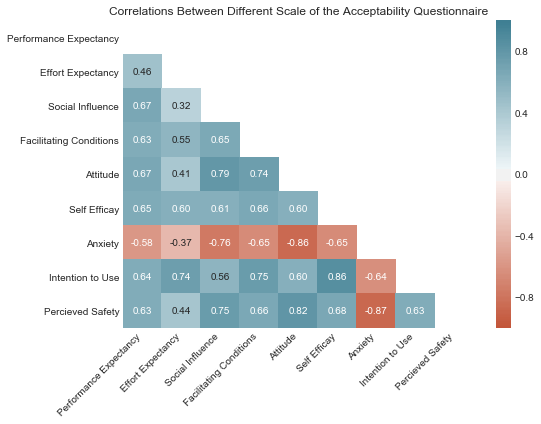

In [39]:
%matplotlib inline
sns.set_style('ticks')

# this will results in condition x analyzied num of participants as observations
concat_RNT  = pd.concat([rain_acc_stacked, norm_acc_stacked, trfc_acc_stacked])
concat_RNT = concat_RNT.apply(lambda x: pd.to_numeric(x, errors='ignore'))
#concat_RNT.to_csv(path_or_buf= r"C:\Users\haghzaS\Documents\0-MAIN_STUDIES\
#01- Acceptability of AVs\Data Analysis\Qualitative_Data_Analysis\Version Control_April-19-2019\R-Exports\export_concat_RNT.csv", index = None, header=True)

corr_matrix = concat_RNT.corr(method='spearman')

# mask for upper traingle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


fig, ax = plt.subplots(figsize=(8, 6))#figsize=(11, 9) 

# vmin and vmax control the range of the colormap
#cmap='RdBu'
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask = mask, cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.title("Correlations Between Different Scale of the Acceptability Questionnaire")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

### Clustermap

Clustermaps make correlations especially informative in analyzing survey responses, because they use hierarchical clustering to (in this case) group benefits together by how closely related they are.

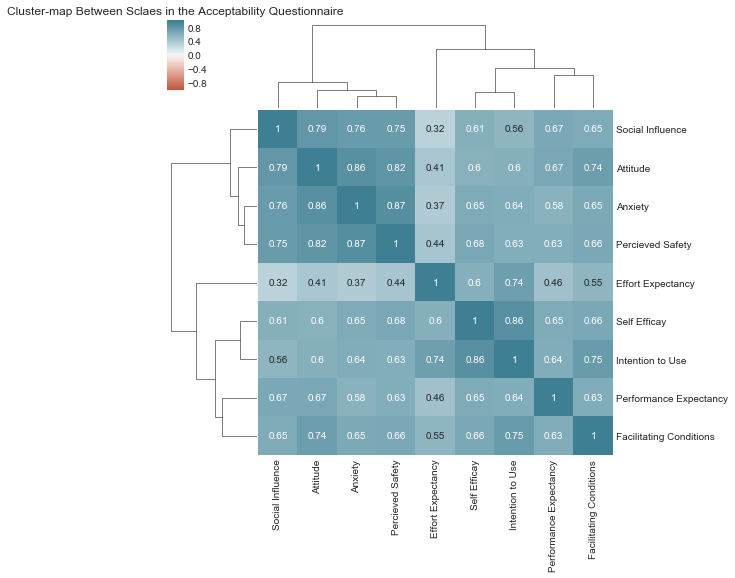

In [41]:
plt.rcParams.update({'font.size': 10})
concat_RNT_anx_reverse = concat_RNT.copy()
concat_RNT_anx_reverse['Anxiety'] = list(8- concat_RNT_anx_reverse['Anxiety'])
corr_matrix_anx_reversed = concat_RNT_anx_reverse.corr(method='spearman')


sns.clustermap(corr_matrix_anx_reversed, method='ward', cmap=sns.diverging_palette(20, 220, n=200), annot=True,
               vmin=-1, vmax=1, figsize=(8,8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.title("Cluster-map Between Sclaes in the Acceptability Questionnaire")



plt.show()

## Acceptability across RTN within both completed and incomplete participants

In [42]:
norm_acc_stacked.mean(1)

Participant ID
4.0     4.370370
7.0     5.148148
9.0     4.685185
10.0    4.666667
14.0    2.611111
15.0    5.796296
16.0    2.370370
18.0    3.111111
dtype: float64

In [43]:
trfc_acc_stacked.mean(1)

Participant ID
2.0    5.685185
4.0    4.462963
7.0    4.833333
9.0    4.592593
dtype: float64

In [44]:
rain_acc_stacked.mean(1)

Participant ID
2.0     5.222222
4.0     5.111111
5.0     4.777778
7.0     6.000000
9.0     4.777778
11.0    3.703704
15.0    5.925926
16.0    2.648148
18.0    2.388889
dtype: float64

## 3.4 Below, ACC Scores and Demographics

- Linear regression of acceptability scores (y; rain, normal and total) by age
- linear regression of acceptability scores (y; rain, normal and total) by MoCA scores
- Linear regression of acceptability scores (y; rain, normal and total) by years of driving experience
- Visual Acquity Score (LogMAR)_Right 
- Visual Acquity Score (LogMAR)_Left

#### 3.4.1 We will first look at the demographics themselves and how they correlate:

In [45]:
eveyone_demographics = Demographics.loc[complete_incomplete_IDs]

In [46]:
# first we will get the countable measures of interest from dempgraphics
countable_demographics = eveyone_demographics.copy()
countable_demographics_measures = ['Age', 'Years of Driving Experience', 'MoCA Score',
                                                    'Visual Acuity Score (LogMAR)_Right',
                                                    'Visual Acuity Score (LogMAR)_Left']

countable_demographics = countable_demographics.loc[:,countable_demographics_measures ]
demographics_corr_matrix = countable_demographics.corr(method = 'pearson')
demographics_corr_matrix.to_csv('democorr.csv', index=True)

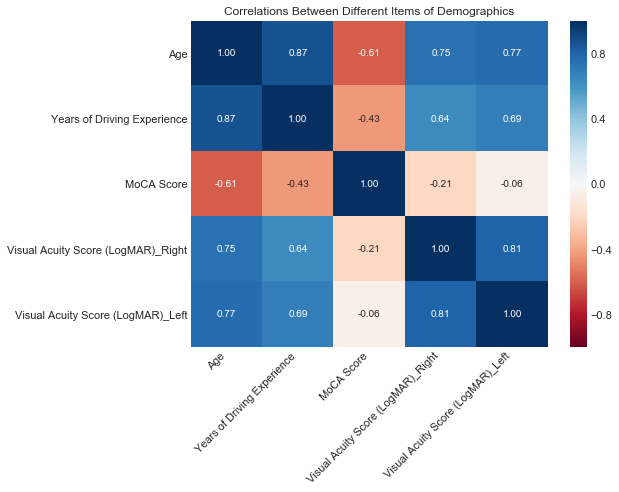

In [307]:
# Drawing the correlation map between the countable demographics
cmap='RdBu'
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(demographics_corr_matrix , cmap=cmap, annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0)


plt.title("Correlations Between Different Items of Demographics")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.show()

The dark red colour represents that there is no linear relationship between the two variables. A darker blue shade shows that the relationship between the variables is more linear.

#### 3.4.2 Below, we will look at the TOTAL ACC and Subscales as a function of age, MoCA, years of driving and LogMAR

In [47]:
## we will take total scales in acc and concat them 
def add_total_scores_to_scenario_acc(df_in, scenario_string):
    df_copy = df_in.copy()
    df_copy.loc[:,"Median Acceptability"] = df_in.median(1)
    df_copy.loc[:,"Mean Acceptability"] = df_in.mean(1)
    df_copy.loc[:,"Driving Condition"] = scenario_string
    return df_copy

rain_acc_totals = add_total_scores_to_scenario_acc(rain_acc_stacked, "Rain")
norm_acc_totals = add_total_scores_to_scenario_acc(norm_acc_stacked, 'Norm')
trfc_acc_totals = add_total_scores_to_scenario_acc(trfc_acc_stacked, 'Traffic')

acc_total_per_scenario = pd.concat([norm_acc_totals, rain_acc_totals, trfc_acc_totals],0)

acc_total_per_scenario #: acc scores across all scales + total for each scenario in a row

,Performance Expectancy,Effort Expectancy,Social Influence,Facilitating Conditions,Attitude,Self Efficay,Anxiety,Intention to Use,Percieved Safety,Median Acceptability,Mean Acceptability,Driving Condition
Participant ID,,,,,,,,,,,,
4.0,4.666667,4.666667,4.666667,4.0,4.666667,4.333333,5.0,3.0,4.333333,4.666667,4.370370,Norm
7.0,5.666667,7.000000,3.000000,5.5,3.666667,6.000000,5.5,7.0,3.000000,5.500000,5.148148,Norm
9.0,4.333333,5.666667,5.666667,5.0,4.000000,5.333333,4.5,4.0,3.666667,4.500000,4.685185,Norm
10.0,5.666667,3.666667,5.000000,6.5,5.333333,4.666667,5.5,3.0,2.666667,5.000000,4.666667,Norm
14.0,1.000000,7.000000,1.000000,2.5,2.000000,1.000000,7.0,1.0,1.000000,1.000000,2.611111,Norm
15.0,6.000000,7.000000,6.666667,5.5,6.000000,6.333333,2.5,6.5,5.666667,6.000000,5.796296,Norm
16.0,3.333333,2.333333,2.000000,1.0,1.333333,2.333333,7.0,1.0,1.000000,2.000000,2.370370,Norm
18.0,2.666667,3.333333,2.000000,2.0,2.333333,5.000000,6.0,2.0,2.666667,2.666667,3.111111,Norm
2.0,3.333333,5.666667,6.333333,6.0,5.666667,6.000000,4.0,5.0,5.000000,5.666667,5.222222,Rain


In [48]:
acc_total_per_per_participant = acc_total_per_scenario.groupby('Participant ID').mean()
acc_total_per_per_participant
#: acc scores (mean) across all scales + total for each participants in a row

,Performance Expectancy,Effort Expectancy,Social Influence,Facilitating Conditions,Attitude,Self Efficay,Anxiety,Intention to Use,Percieved Safety,Median Acceptability,Mean Acceptability
Participant ID,,,,,,,,,,,
2.0,4.500000,6.000000,6.333333,5.500000,5.833333,6.166667,3.500000,5.750000,5.500000,5.833333,5.453704
4.0,4.888889,5.555556,4.777778,4.333333,4.666667,4.666667,5.000000,3.166667,4.777778,4.777778,4.648148
5.0,2.666667,6.000000,4.333333,6.000000,4.666667,4.666667,5.000000,5.000000,4.666667,4.666667,4.777778
7.0,5.222222,7.000000,3.666667,5.666667,3.888889,6.333333,5.500000,7.000000,3.666667,5.333333,5.327160
9.0,4.555556,5.555556,5.666667,5.000000,4.000000,4.888889,5.333333,3.833333,3.333333,4.611111,4.685185
10.0,5.666667,3.666667,5.000000,6.500000,5.333333,4.666667,5.500000,3.000000,2.666667,5.000000,4.666667
11.0,3.666667,4.666667,5.000000,2.500000,2.333333,4.333333,6.000000,1.500000,3.333333,3.666667,3.703704
14.0,1.000000,7.000000,1.000000,2.500000,2.000000,1.000000,7.000000,1.000000,1.000000,1.000000,2.611111
15.0,5.833333,6.666667,6.500000,5.750000,6.000000,6.333333,3.750000,6.250000,5.666667,6.000000,5.861111


#### Exploring if there is a monotonic (spearman) or linear (pearson) relashionship between demographics and ACC scores

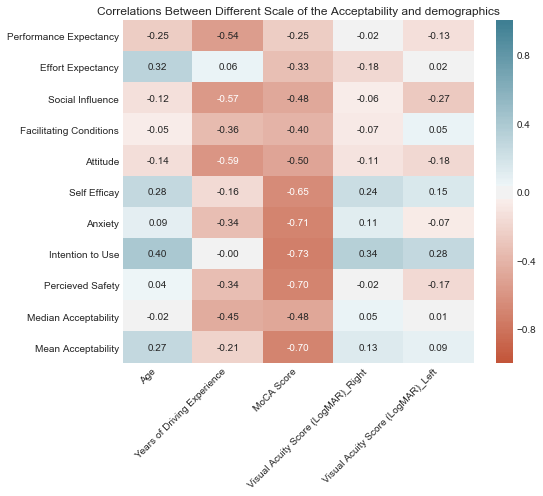

In [49]:
data = pd.concat([acc_total_per_per_participant, countable_demographics],1)
data['Anxiety'] = list(8- data['Anxiety'])

acc_demo_corr = data.corr(method = 'spearman').loc[acc_total_per_per_participant.keys(), countable_demographics.keys()]

fig, ax = plt.subplots(figsize=(8, 7))#figsize=(11, 9) 
sns.heatmap(acc_demo_corr,cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.title("Correlations Between Different Scale of the Acceptability and demographics")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


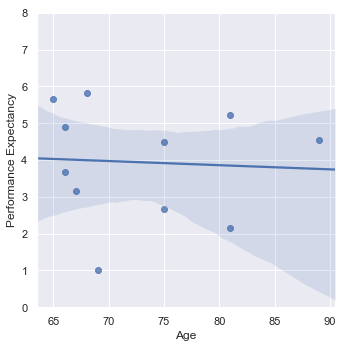

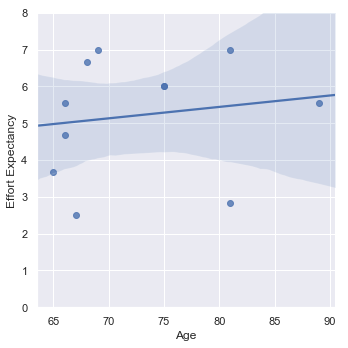

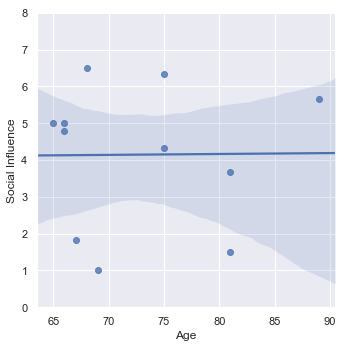

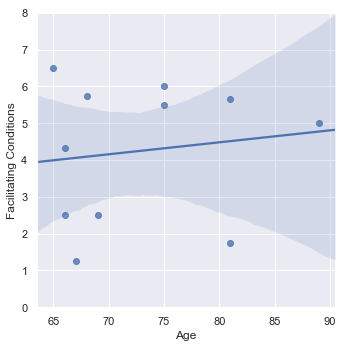

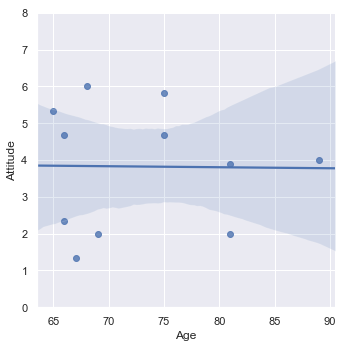

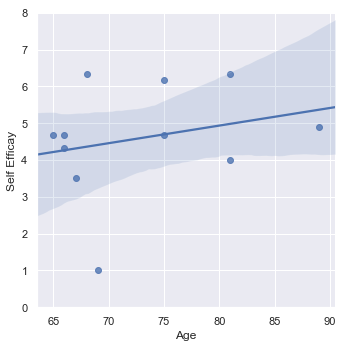

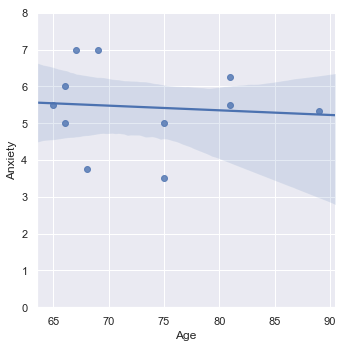

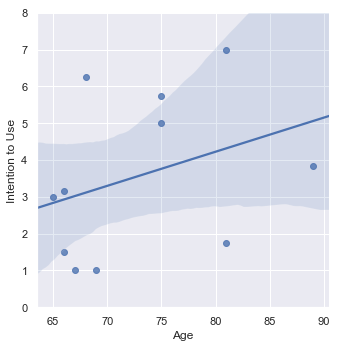

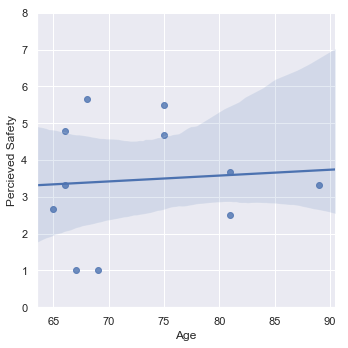

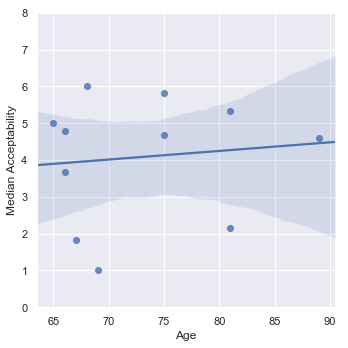

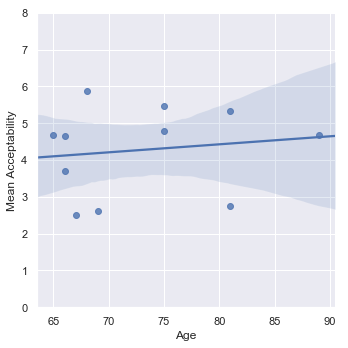

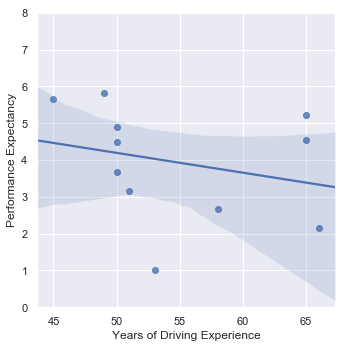

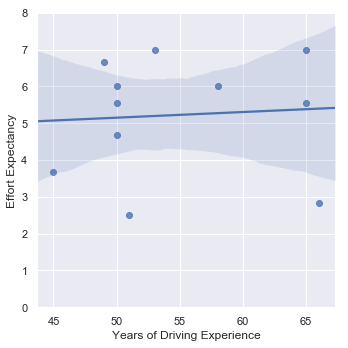

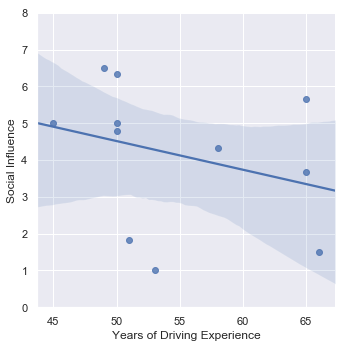

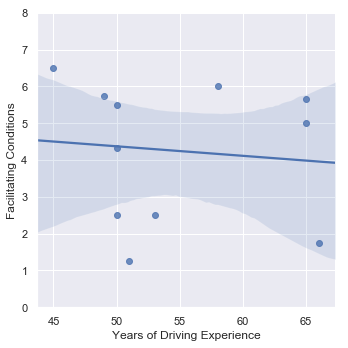

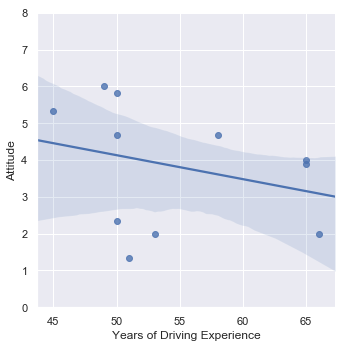

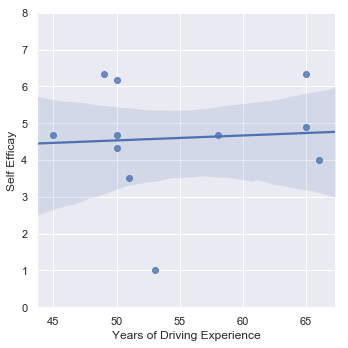

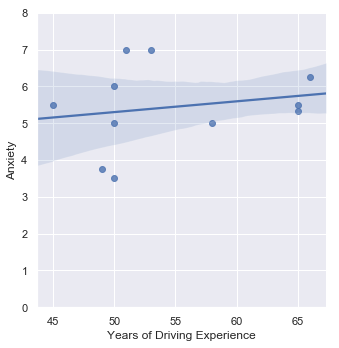

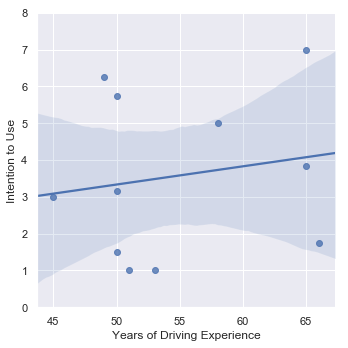

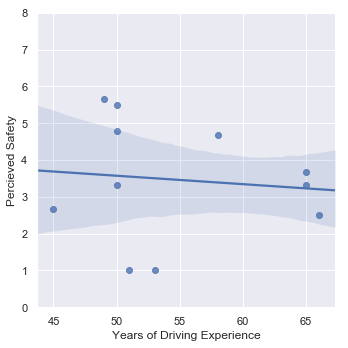

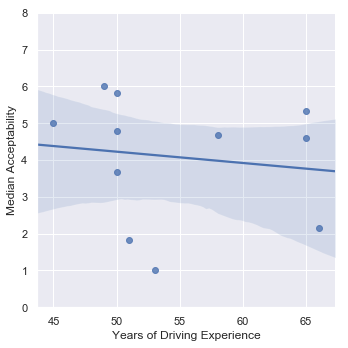

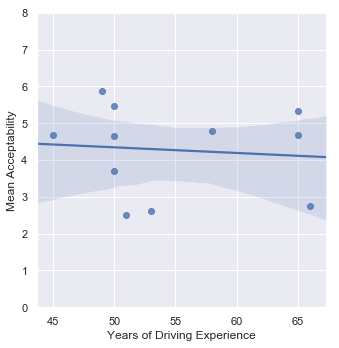

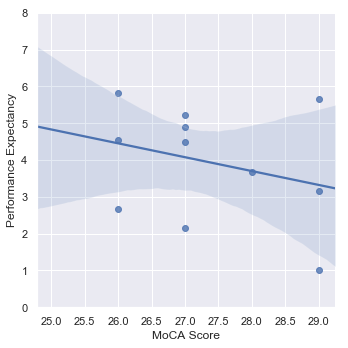

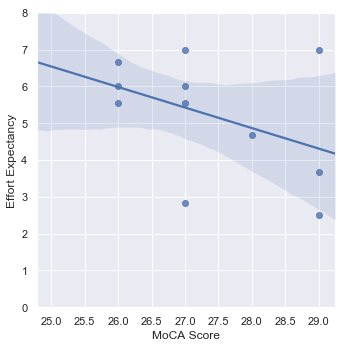

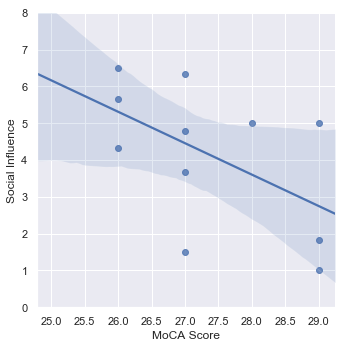

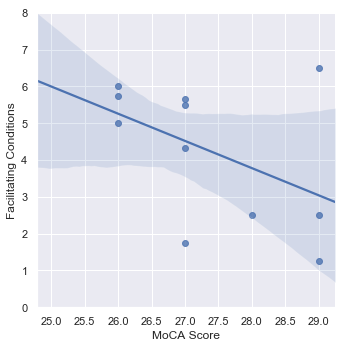

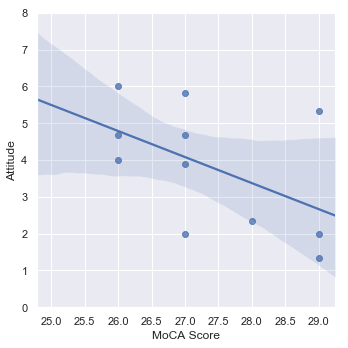

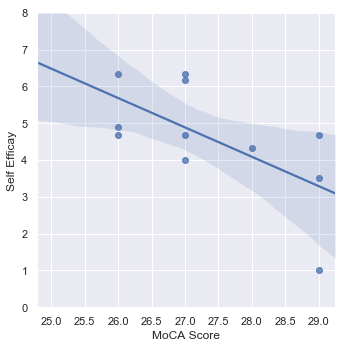

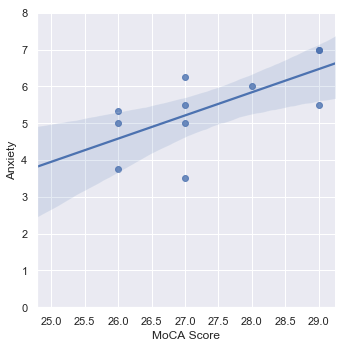

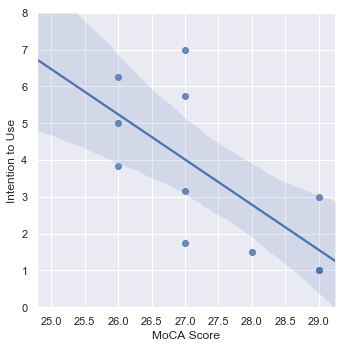

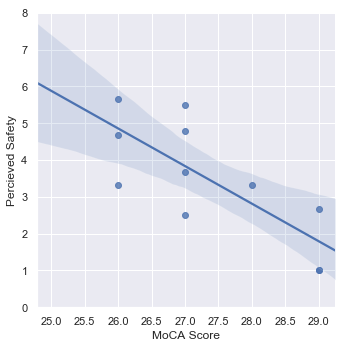

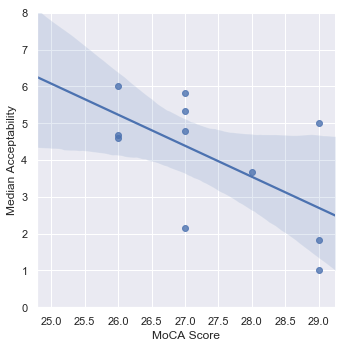

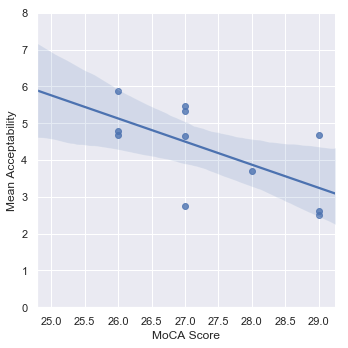

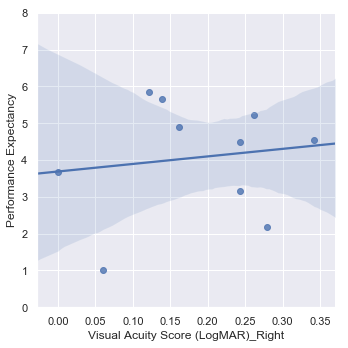

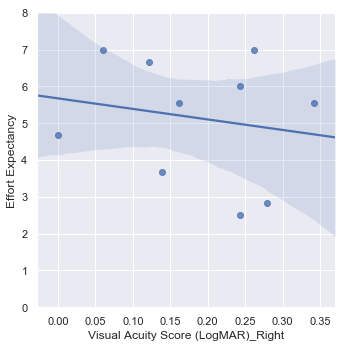

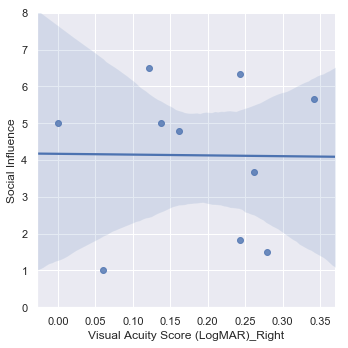

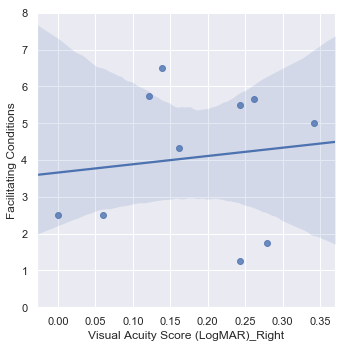

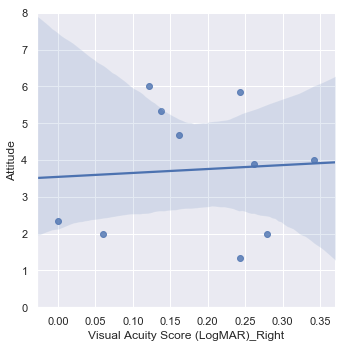

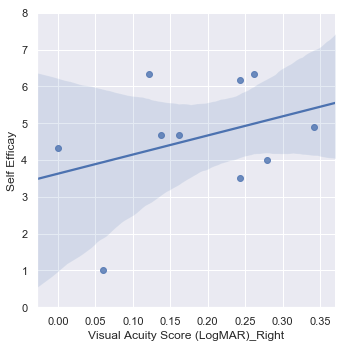

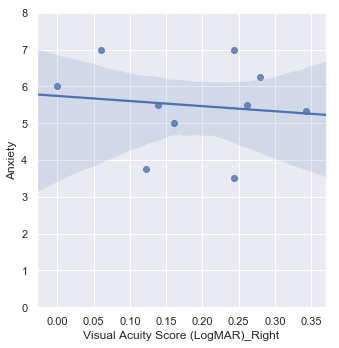

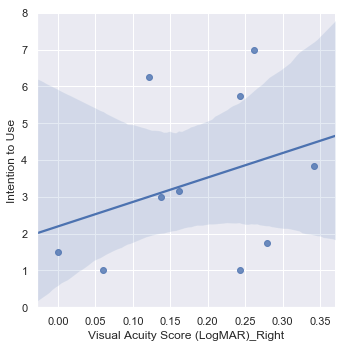

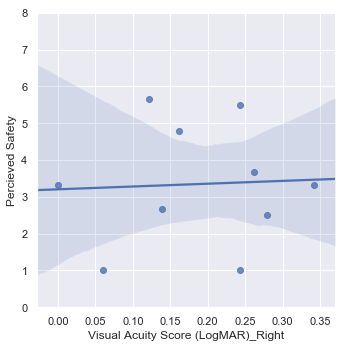

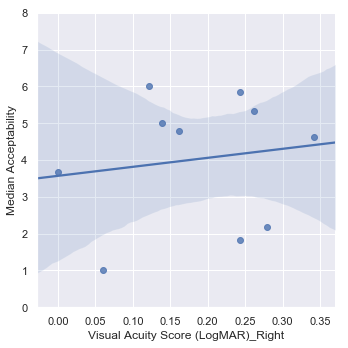

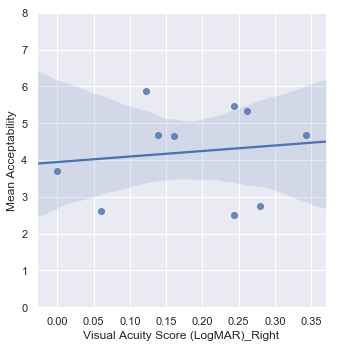

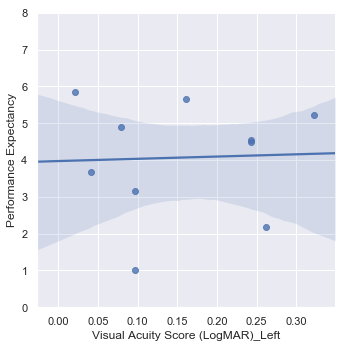

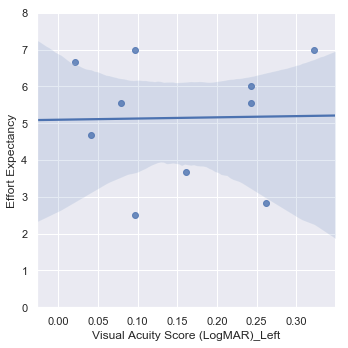

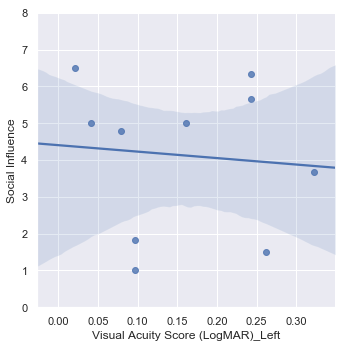

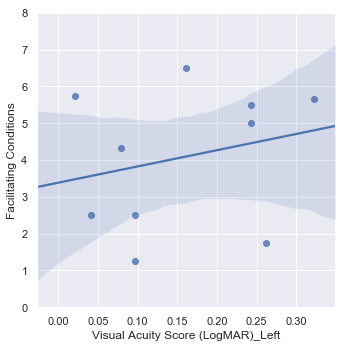

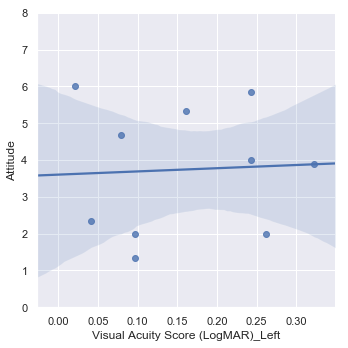

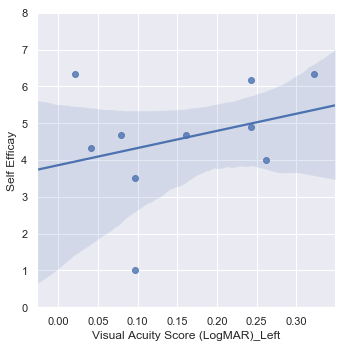

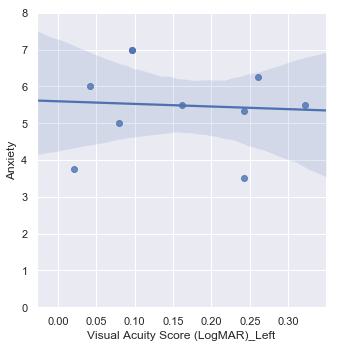

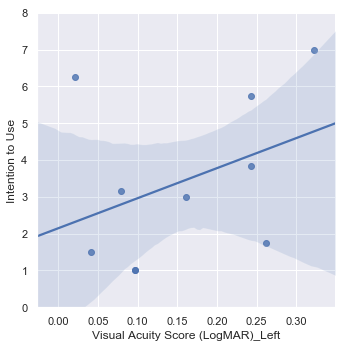

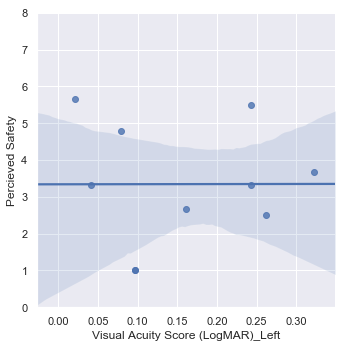

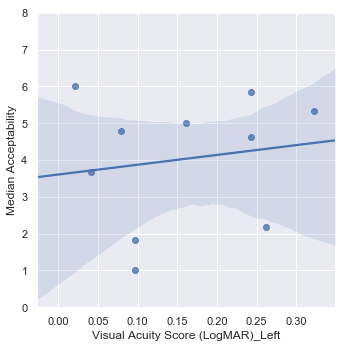

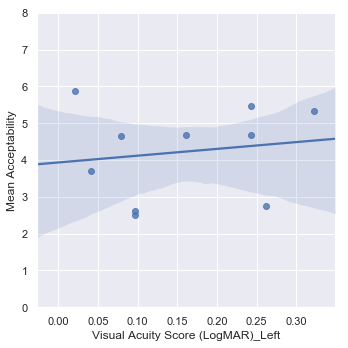

In [50]:
# Now we will concat the *acc_total_complete* with * countable demographics
data = pd.concat([acc_total_per_per_participant, countable_demographics],1)

# Let's draw the regression lines:
sns.set(style="darkgrid")

for x in countable_demographics_measures:
    for y in acc_total_per_per_participant.keys():
        g = (sns.lmplot(x=x, y=y, data = data)).set(ylim = (0,8))

#### 3.4.3 We will be looking at the TOTAL ACC and subscale across driving conditions

C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\pandas\core\indexes\base.py:2657: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)


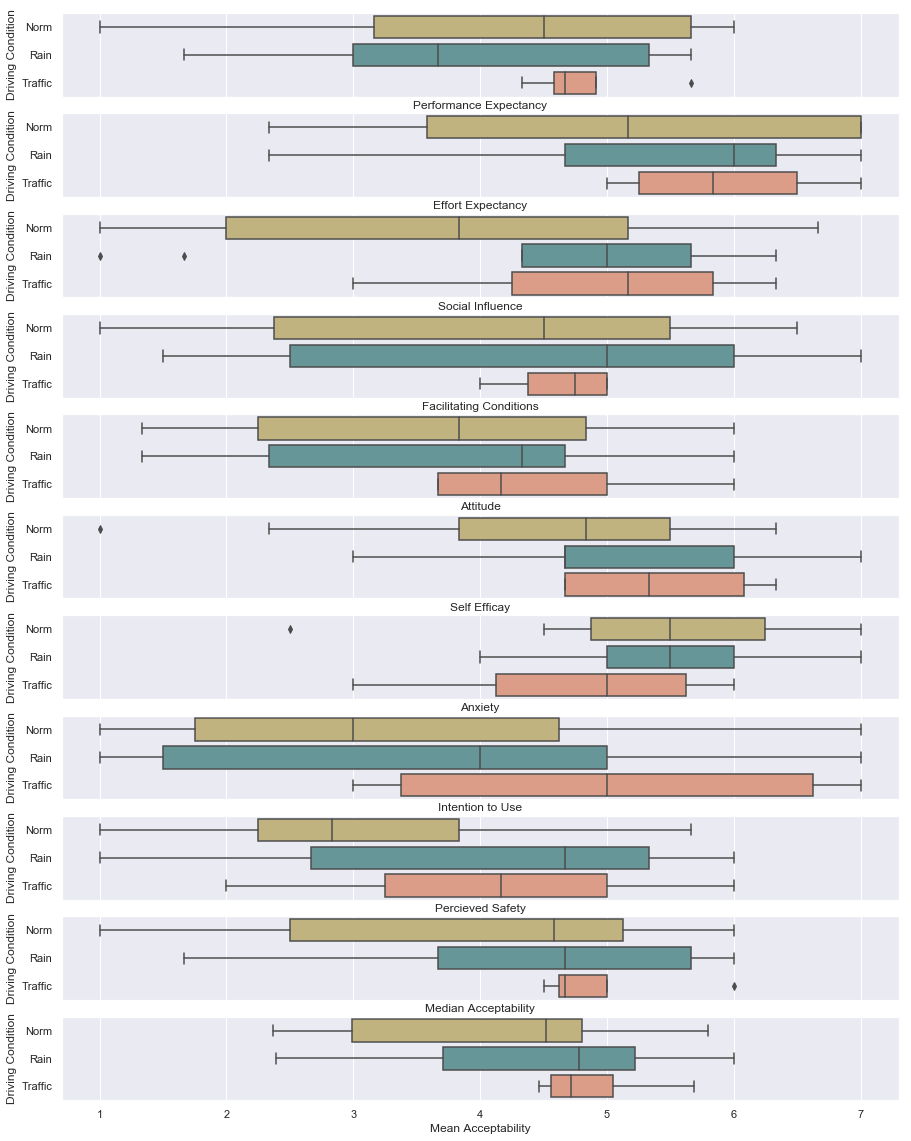

In [51]:
# specifying color for each group
my_pal = {'Norm':'y', 'Rain':'cadetblue', 'Traffic': 'darksalmon'}

figure, axes = plt.subplots(len(acc_total_per_per_participant.keys()),1, figsize = (15,20), sharex= True)
i = 0
for x in acc_total_per_per_participant.keys():
    sns.boxplot(x=x,y='Driving Condition', data=acc_total_per_scenario, orient= "h",ax = axes[i], palette = my_pal)
    i = i+1 



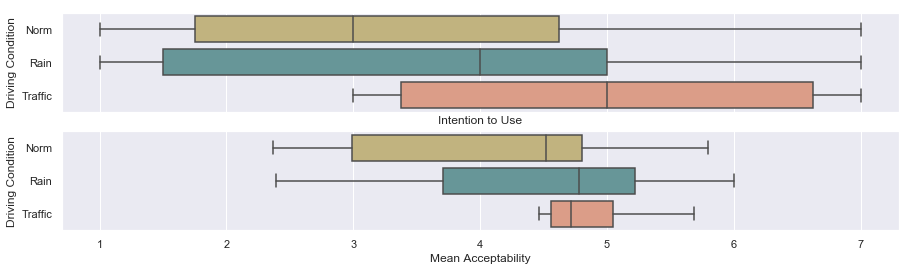

In [221]:
figure, axes = plt.subplots(2,1, figsize = (15,4), sharex= True)
sns.boxplot(x="Intention to Use",y='Driving Condition', data=acc_total_per_scenario, orient= "h",ax = axes[0], palette = my_pal)
sns.boxplot(x="Mean Acceptability",y='Driving Condition', data=acc_total_per_scenario, orient= "h",ax = axes[1], palette = my_pal)

#### 3.4.4 We will be looking at each scenario's ACC and subscale as a function of demographics

In [52]:
## Saving for later sxport to R
acc_demo_rain = pd.concat([countable_demographics,rain_acc_totals],1).dropna()
acc_demo_trfc = pd.concat([countable_demographics,trfc_acc_totals],1).dropna()
acc_demo_norm = pd.concat([countable_demographics,norm_acc_totals],1).dropna()

acc_demo = pd.concat([acc_demo_norm, acc_demo_rain, acc_demo_trfc ])

In [53]:
acc_demo

,Age,Years of Driving Experience,MoCA Score,Visual Acuity Score (LogMAR)_Right,Visual Acuity Score (LogMAR)_Left,Performance Expectancy,Effort Expectancy,Social Influence,Facilitating Conditions,Attitude,Self Efficay,Anxiety,Intention to Use,Percieved Safety,Median Acceptability,Mean Acceptability,Driving Condition
Participant ID,,,,,,,,,,,,,,,,,
4.0,66.0,50.0,27.0,0.161368,0.079181,4.666667,4.666667,4.666667,4.0,4.666667,4.333333,5.0,3.0,4.333333,4.666667,4.370370,Norm
7.0,81.0,65.0,27.0,0.261263,0.322219,5.666667,7.000000,3.000000,5.5,3.666667,6.000000,5.5,7.0,3.000000,5.500000,5.148148,Norm
9.0,89.0,65.0,26.0,0.342423,0.243038,4.333333,5.666667,5.666667,5.0,4.000000,5.333333,4.5,4.0,3.666667,4.500000,4.685185,Norm
10.0,65.0,45.0,29.0,0.138303,0.161368,5.666667,3.666667,5.000000,6.5,5.333333,4.666667,5.5,3.0,2.666667,5.000000,4.666667,Norm
14.0,69.0,53.0,29.0,0.060698,0.096910,1.000000,7.000000,1.000000,2.5,2.000000,1.000000,7.0,1.0,1.000000,1.000000,2.611111,Norm
15.0,68.0,49.0,26.0,0.122216,0.021189,6.000000,7.000000,6.666667,5.5,6.000000,6.333333,2.5,6.5,5.666667,6.000000,5.796296,Norm
16.0,67.0,51.0,29.0,0.243038,0.096910,3.333333,2.333333,2.000000,1.0,1.333333,2.333333,7.0,1.0,1.000000,2.000000,2.370370,Norm
18.0,81.0,66.0,27.0,0.278754,0.261263,2.666667,3.333333,2.000000,2.0,2.333333,5.000000,6.0,2.0,2.666667,2.666667,3.111111,Norm
2.0,75.0,50.0,27.0,0.243038,0.243038,3.333333,5.666667,6.333333,6.0,5.666667,6.000000,4.0,5.0,5.000000,5.666667,5.222222,Rain


In [54]:
# now we are going to plot 
acc_scale = input("Which of the ACC scales or total mean or median as a function of countable demographics?")
for x in countable_demographics_measures:
    g = (sns.lmplot(x=x, y=acc_scale, hue= "Driving Condition", data=acc_demo, palette = my_pal)).set(ylim = (0,8))

Which of the ACC scales or total mean or median as a function of countable demographics?


KeyError: "[''] not in index"

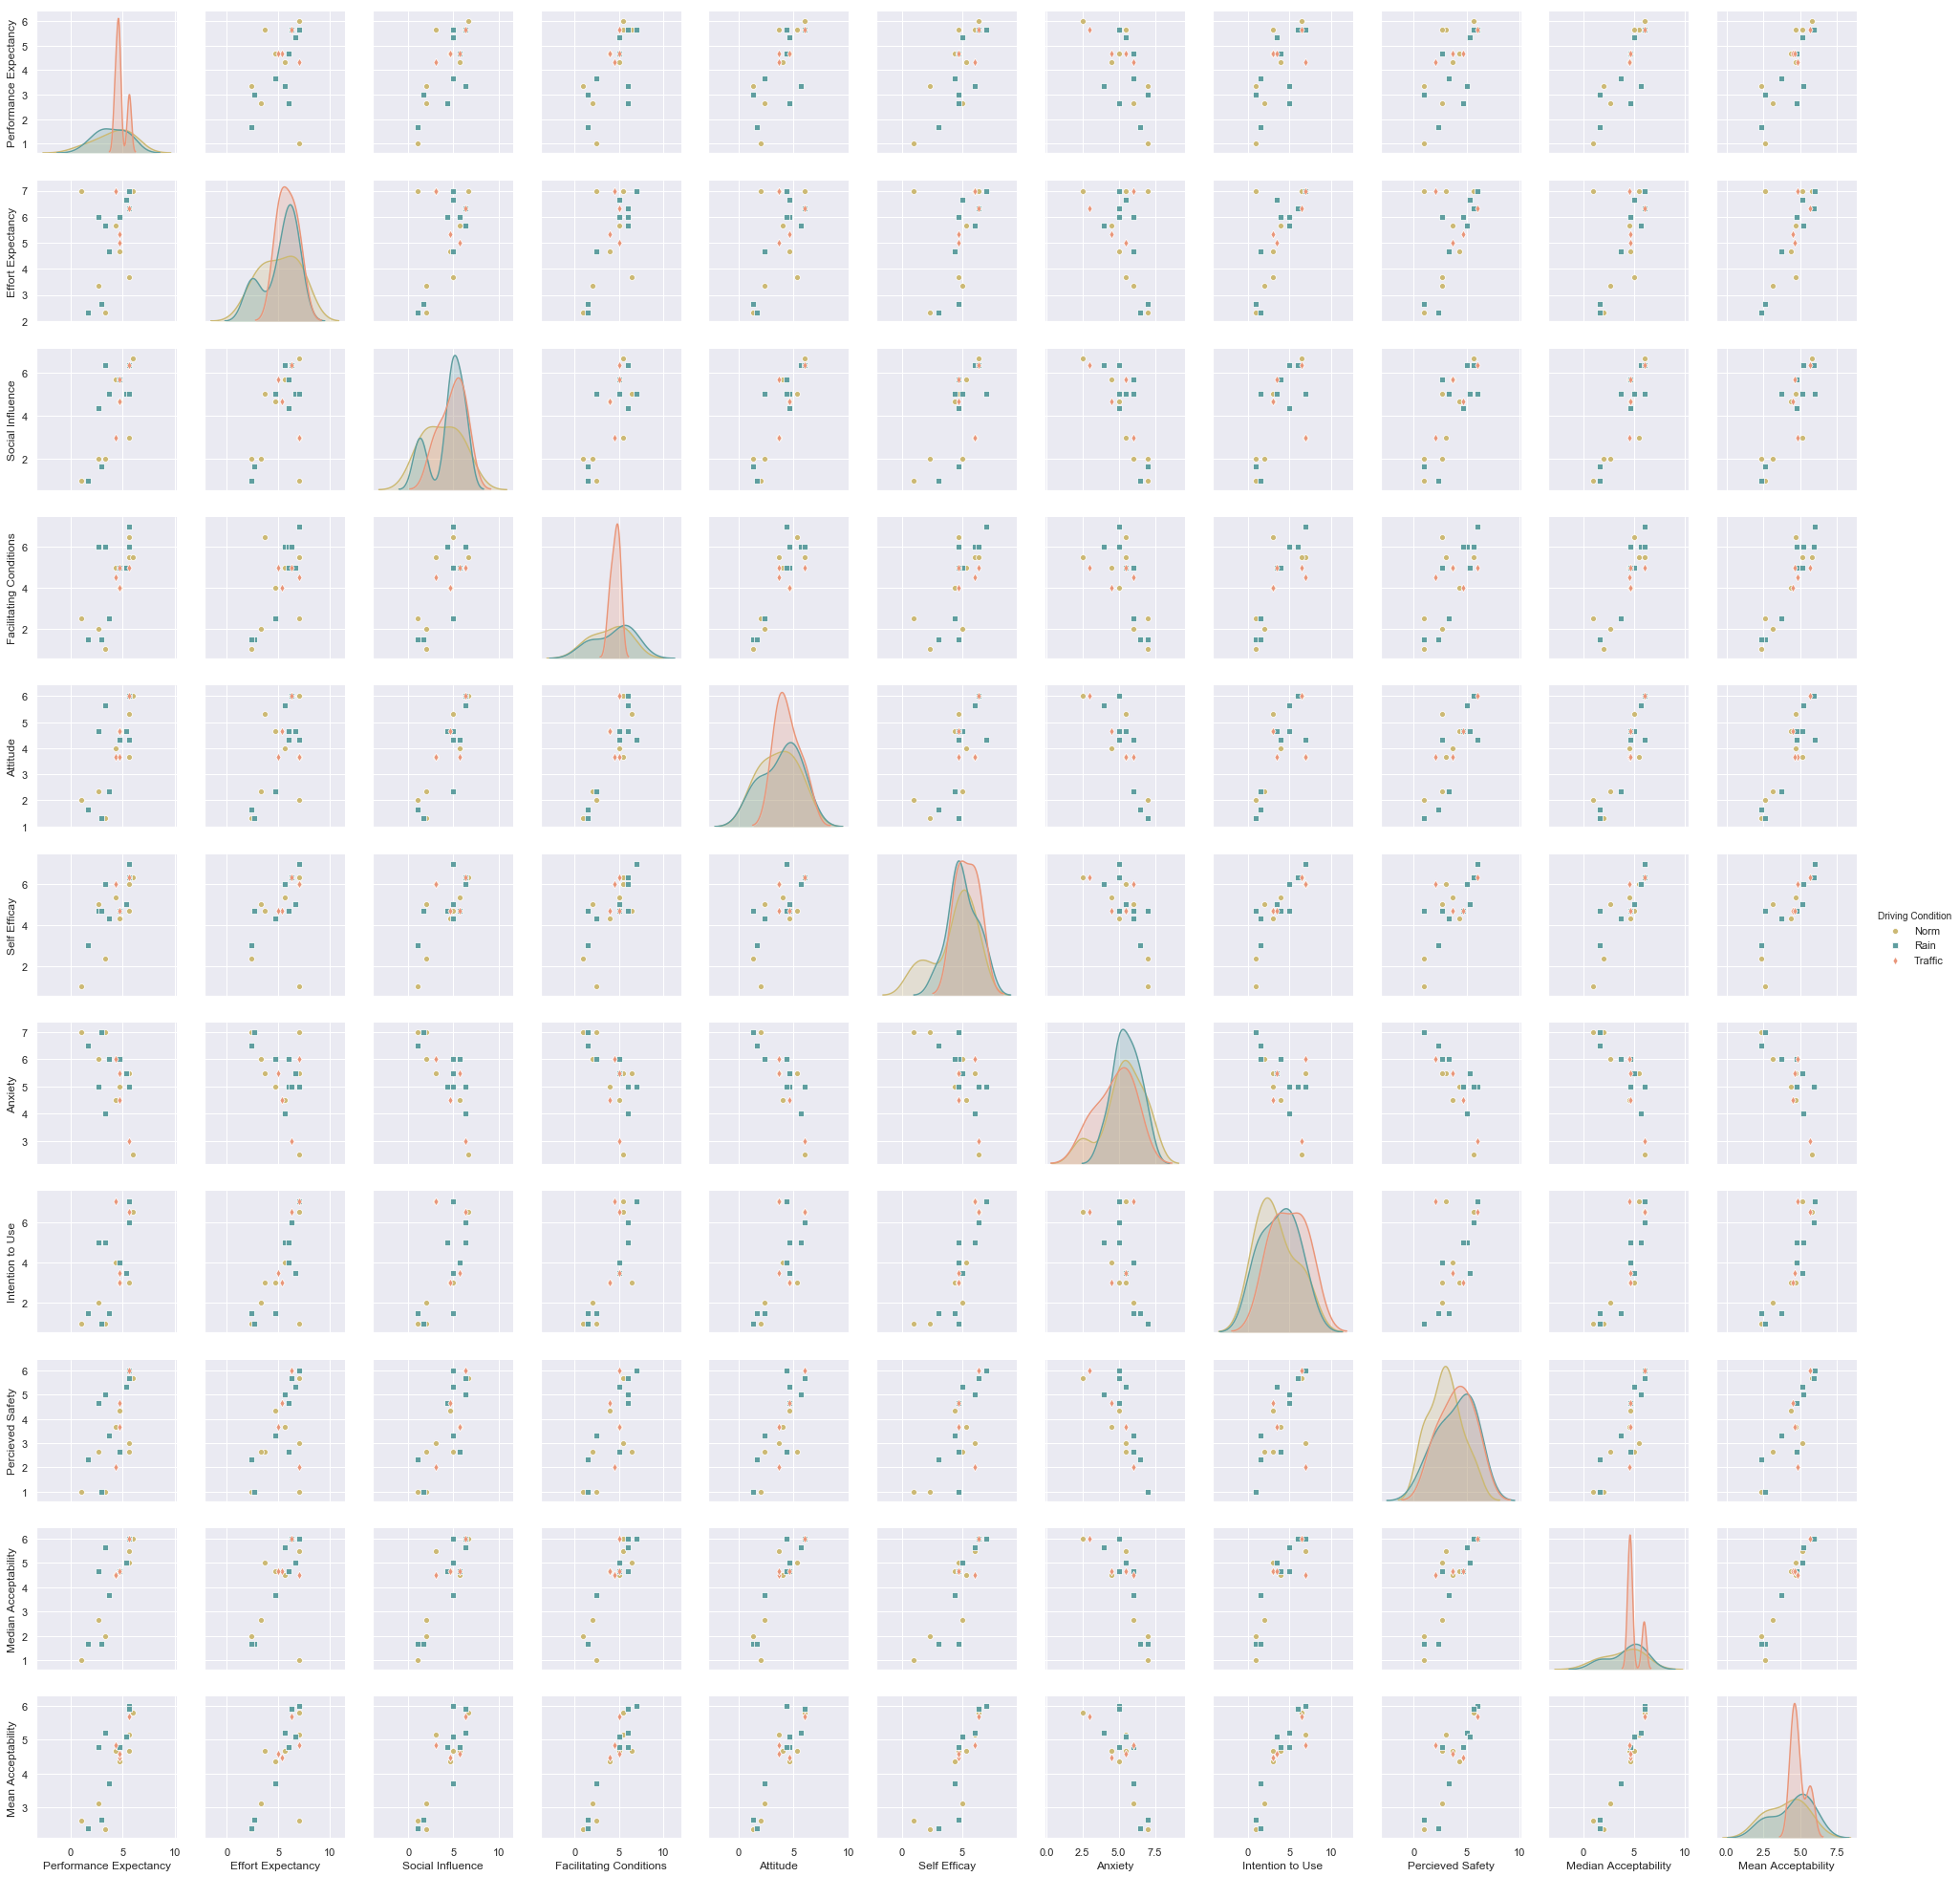

In [55]:
sns.pairplot(acc_total_per_scenario, kind="scatter", hue="Driving Condition", markers=["o", "s", "d"], palette= my_pal)
plt.show()


## 3.5 ACC scores and POMS Scores

In [56]:
acc_POMS = pd.concat([acc_total_per_per_participant, POMS_tscores_CIC],1).dropna()

In [57]:
acc_POMS

,Performance Expectancy,Effort Expectancy,Social Influence,Facilitating Conditions,Attitude,Self Efficay,Anxiety,Intention to Use,Percieved Safety,Median Acceptability,Mean Acceptability,Tension Score,Anger Score,Fatigue Score,Depression Score,Esteem-related affect Score,Vigor Score,Confusion Score,Total Mood Disturbance
Participant ID,,,,,,,,,,,,,,,,,,,
2.0,4.500000,6.000000,6.333333,5.500000,5.833333,6.166667,3.500000,5.750000,5.500000,5.833333,5.453704,41.572665,46.066021,49.243683,44.360816,58.461719,54.580731,45.163709,38.987153
4.0,4.888889,5.555556,4.777778,4.333333,4.666667,4.666667,5.000000,3.166667,4.777778,4.777778,4.648148,41.572665,46.066021,42.184725,44.360816,43.653711,57.369002,41.778306,36.233941
5.0,2.666667,6.000000,4.333333,6.000000,4.666667,4.666667,5.000000,5.000000,4.666667,4.666667,4.777778,50.887088,46.066021,70.420556,52.255673,43.653711,51.792460,55.319920,61.012847
7.0,5.222222,7.000000,3.666667,5.666667,3.888889,6.333333,5.500000,7.000000,3.666667,5.333333,5.327160,47.782280,73.603874,42.184725,44.360816,58.461719,49.004189,48.549113,44.493577
9.0,4.555556,5.555556,5.666667,5.000000,4.000000,4.888889,5.333333,3.833333,3.333333,4.611111,4.685185,41.572665,46.066021,42.184725,44.360816,43.653711,37.851105,41.778306,45.870182
10.0,5.666667,3.666667,5.000000,6.500000,5.333333,4.666667,5.500000,3.000000,2.666667,5.000000,4.666667,63.306318,73.603874,49.243683,68.045387,65.865723,65.733815,48.549113,48.623394
11.0,3.666667,4.666667,5.000000,2.500000,2.333333,4.333333,6.000000,1.500000,3.333333,3.666667,3.703704,41.572665,46.066021,42.184725,44.360816,51.057715,43.427647,41.778306,41.740365
14.0,1.000000,7.000000,1.000000,2.500000,2.000000,1.000000,7.000000,1.000000,1.000000,1.000000,2.611111,41.572665,46.066021,42.184725,44.360816,51.057715,37.851105,41.778306,44.493577
15.0,5.833333,6.666667,6.500000,5.750000,6.000000,6.333333,3.750000,6.250000,5.666667,6.000000,5.861111,41.572665,46.066021,42.184725,44.360816,43.653711,43.427647,41.778306,43.116971


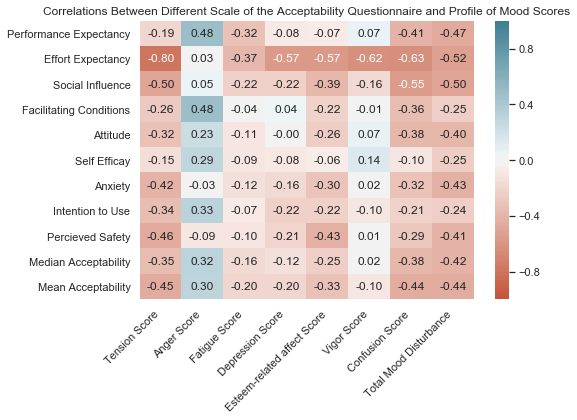

In [58]:
data = acc_POMS.copy()
data['Anxiety'] = list(8- data['Anxiety'])
acc_POMS_corr = data.corr().loc[acc_total_per_per_participant.keys(), POMS_tscores_CIC.keys()]


fig, ax = plt.subplots(figsize=(8, 6))#figsize=(11, 9) 
sns.heatmap(acc_POMS_corr,cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.title("Correlations Between Different Scale of the Acceptability Questionnaire and Profile of Mood Scores")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

In [59]:
for x in POMS_tscores:
    for y in acc_total_per_per_participant.keys():
        g = (sns.lmplot(x=x, y=y, data = acc_POMS )).set(ylim = (0,8))

NameError: name 'POMS_tscores' is not defined

## 3.6 Correlation of ACC Scores with Participant groups

- If they have done Manual or Auto first
- If they have done rain or traffic first
- combined across 4 groups

## 3.6 AONOVA - Significance of Variability of ACC between conditions

In [60]:
X = demo_acc.loc[:, 'Age']
y = demo_acc.loc[:,acc_scale]
model_fit = sm.OLS(y, sm.add_constant(X)).fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)

# model values
model_fitted_y = model_fit.fittedvalues
        # model residuals
        model_residuals = model_fit.resid
        # normalized residuals
        model_norm_residuals = model_fit.get_influence().resid_studentized_internal
        # absolute squared normalized residuals
        model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
        # absolute residuals
        model_abs_resid = np.abs(model_residuals)
        # leverage, from statsmodels internals
        model_leverage = model_fit.get_influence().hat_matrix_diag
        # cook's distance, from statsmodels internals
        model_cooks = model_fit.get_influence().cooks_distance[0]

        plot_lm_1 = plt.figure()
        plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

        plot_lm_1.axes[0].set_title('Residuals vs Fitted')
        plot_lm_1.axes[0].set_xlabel('Fitted values')
        plot_lm_1.axes[0].set_ylabel('Residuals');

        # annotations
        abs_resid = model_abs_resid.sort_values(ascending=False)
        abs_resid_top_3 = abs_resid[:3]

IndentationError: unexpected indent (<ipython-input-60-ef616fdb3ab5>, line 11)

In [ ]:
diagnostic_plots(demo_acc.loc[:,'Age'], demo_acc.loc[:,acc_scale], model_fit=None)
def diagnostic_plots(X, y, model_fit=None):
    """
    Function to reproduce the 4 base plots of an OLS model in R.

    ---
      Inputs:

      X: A numpy array or pandas dataframe of the features to use in building the linear regression model

      y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

      model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
    """

    if not model_fit:
        model_fit = sm.OLS(y, sm.add_constant(X)).fit()

    # create dataframe from X, y for easier plot handling
    dataframe = pd.concat([X, y], axis=1)

    # model values
    model_fitted_y = model_fit.fittedvalues
    # model residuals
    model_residuals = model_fit.resid
    # normalized residuals
    model_norm_residuals = model_fit.get_influence().resid_studentized_internal
    # absolute squared normalized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    # absolute residuals
    model_abs_resid = np.abs(model_residuals)
    # leverage, from statsmodels internals
    model_leverage = model_fit.get_influence().hat_matrix_diag
    # cook's distance, from statsmodels internals
    model_cooks = model_fit.get_influence().cooks_distance[0]
    
    plot_lm_1 = plt.figure()
    plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals');

    # annotations
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]
    for i in abs_resid_top_3.index:
        plot_lm_1.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_residuals[i]));

    QQ = ProbPlot(model_norm_residuals)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    for r, i in enumerate(abs_norm_resid_top_3):
        plot_lm_2.axes[0].annotate(i,
                                 xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                     model_norm_residuals[i]));

    plot_lm_3 = plt.figure()
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_3.axes[0].set_title('Scale-Location')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

  # annotations
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_norm_resid_top_3:
        plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));


    plot_lm_4 = plt.figure();
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
    sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
    plot_lm_4.axes[0].set_ylim(-3, 5)
    plot_lm_4.axes[0].set_title('Residuals vs Leverage')
    plot_lm_4.axes[0].set_xlabel('Leverage')
    plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
        plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

    p = len(model_fit.params) # number of model parameters
    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50)) # 1 line
    plot_lm_4.legend(loc='upper right');

# 4. Simulation Sickness Questionnaire

It is calculated by adding scores on the 16 items and multiplying the achieved sum by 3.74, therefore the total score can range from 0 to 179.52.

According to the results of a factor analysis, the items of the SSQ can be grouped into three factors: nausea (e.g., sweating, difficulty concentrating, stomach awareness), oculomotor disturbance (e.g., headache, eyestrain, blurred vision) and disorientation (e.g., fullness head, dizziness with open and closed eyes, vertigo). The factors are not entirely independent – some of the items were included in more than one factor, e.g., the score on difficulty focusing is used to assess the severity of oculomotor disturbance and disorientation. In total, there are five such items. To calculate scores on each factor, all relevant items’ scores should be added (each factor consists of 7 items) and multiplying the obtained sum by a specific weight: for nausea by 9.54 (therefore the scores on this scale range from 0 to 200.34), for disorientation by 13.92 (scores ranging from 0 to 292.32) and for oculomotor disturbance by 7.58 (with scores ranging from 0 to 159.18).

In [ ]:
# reading the SSQ data into a dataframe--- index = participant ID, colums = feature label
SSQ = pd.read_excel(Qualitative_Path + "SSQ.xlsx", sheet_name = "Master_SSQ")
SSQ = SSQ.set_index('Participant ID')
SSQ_Analyzed = SSQ.loc[Analyzed_IDs]
SSQ_Analyzed = SSQ_Analyzed.drop(columns = ["Status"])
SSQ_Analyzed = SSQ_Analyzed.loc[:,['SSQ_NA','SSQ_NM','SSQ_RM','SSQ_RA']]

In [ ]:
SSQ_Analyzed

## 4.1 The intercorrelation of SSQ scores and Total ACC

## 4.2 The correlation of SSQ scores and ACC scores of each session

In [168]:
SSQ_Total = pd.concat([SSQ_Analyzed.loc[:,'SSQ_NA'], SSQ_Analyzed.loc[:,'SSQ_NM'],SSQ_Analyzed.loc[:,'SSQ_RM'],
                       SSQ_Analyzed.loc[:,'SSQ_RA']],0)

SSQ_Total = pd.DataFrame(SSQ_Total, columns = ['Score'])
SSQ_Total.loc[:, 'Driving Condition']= [str('Norm')]*len(SSQ_Analyzed)*2  + [str('Rain')]*len(SSQ_Analyzed)*2
SSQ_Total.loc[:, 'LoA'] = 2* (['Auto']*len(SSQ_Analyzed) + ['Manual']*len(SSQ_Analyzed))

NameError: name 'SSQ_Analyzed' is not defined

In [169]:
SSQ_Total

NameError: name 'SSQ_Total' is not defined

In [ ]:
sns.boxplot(y = 'Score', x = 'Driving Condition', data = SSQ_Total, palette=my_pal)

In [ ]:
sns.boxplot(y = 'Score', x = 'LoA', data = SSQ_Total, palette=dict(Manual= 'slategrey', Auto= 'firebrick'))

In [ ]:
SSQ = SSQ_Total.groupby(['Participant ID', 'Driving Condition']).mean()
SSQ

In [ ]:
data = acc_POMS.copy()
data['Anxiety'] = list(8- data['Anxiety'])
acc_POMS_corr = data.corr().loc[acc_total_per_per_participant.keys(), POMS_tscores.keys()]


fig, ax = plt.subplots(figsize=(8, 6))#figsize=(11, 9) 
sns.heatmap(acc_POMS_corr,cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.title("Correlations Between Different Scale of the Acceptability Questionnaire and Profile of Mood Scores")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

## 4. Significance

### 4.1 ACC Scores between driving condition
- Dependent Variable: Acceptability Scores and sub-sclae scores

- Independent Variable: Driving Condition (Levels: Normal, Rain) --> One-way ANOVA: Two means are equal

null hypothesis: The means are equal

In [62]:
data = acc_total_per_scenario.copy()
for x in acc_total_per_per_participant.keys():
    print("Effects of Driving Condition on " + x)
    print(stats.f_oneway(data[x][data["Driving Condition"]=="Norm"],data[x][data["Driving Condition"]=="Rain"], 
                                                                            data[x][data['Driving Condition']=="Traffic"]))

Effects of Driving Condition on Performance Expectancy
F_onewayResult(statistic=0.4931788109686544, pvalue=0.6186964642588587)
Effects of Driving Condition on Effort Expectancy
F_onewayResult(statistic=0.34461704786126324, pvalue=0.713064820522853)
Effects of Driving Condition on Social Influence
F_onewayResult(statistic=0.5927559595266677, pvalue=0.5632380935704513)
Effects of Driving Condition on Facilitating Conditions
F_onewayResult(statistic=0.21068249258160235, pvalue=0.8120004679473749)
Effects of Driving Condition on Attitude
F_onewayResult(statistic=0.36454388984509467, pvalue=0.6995244841994259)
Effects of Driving Condition on Self Efficay
F_onewayResult(statistic=0.8531116254565478, pvalue=0.44261075095409885)
Effects of Driving Condition on Anxiety
F_onewayResult(statistic=0.6099327470253493, pvalue=0.554242021045398)
Effects of Driving Condition on Intention to Use
F_onewayResult(statistic=0.6919952085828863, pvalue=0.5134094616887481)
Effects of Driving Condition on Perci

In [63]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

In [70]:
demo_acc

,Age,Years of Driving Experience,MoCA,Visual Acuity Score (LogMAR)_Right,Visual Acuity Score (LogMAR)_Left,PE,EF,SI,Facilitating Conditions,Attitude,Self Efficay,Anxiety,Intention to Use,Percieved Safety,medACC,meanACC,Scenario
Participant ID,,,,,,,,,,,,,,,,,
4.0,66.0,50.0,27.0,0.161368,0.079181,4.666667,4.666667,4.666667,4.0,4.666667,4.333333,5.0,3.0,4.333333,4.666667,4.370370,Norm
7.0,81.0,65.0,27.0,0.261263,0.322219,5.666667,7.000000,3.000000,5.5,3.666667,6.000000,5.5,7.0,3.000000,5.500000,5.148148,Norm
9.0,89.0,65.0,26.0,0.342423,0.243038,4.333333,5.666667,5.666667,5.0,4.000000,5.333333,4.5,4.0,3.666667,4.500000,4.685185,Norm
10.0,65.0,45.0,29.0,0.138303,0.161368,5.666667,3.666667,5.000000,6.5,5.333333,4.666667,5.5,3.0,2.666667,5.000000,4.666667,Norm
14.0,69.0,53.0,29.0,0.060698,0.096910,1.000000,7.000000,1.000000,2.5,2.000000,1.000000,7.0,1.0,1.000000,1.000000,2.611111,Norm
15.0,68.0,49.0,26.0,0.122216,0.021189,6.000000,7.000000,6.666667,5.5,6.000000,6.333333,2.5,6.5,5.666667,6.000000,5.796296,Norm
16.0,67.0,51.0,29.0,0.243038,0.096910,3.333333,2.333333,2.000000,1.0,1.333333,2.333333,7.0,1.0,1.000000,2.000000,2.370370,Norm
18.0,81.0,66.0,27.0,0.278754,0.261263,2.666667,3.333333,2.000000,2.0,2.333333,5.000000,6.0,2.0,2.666667,2.666667,3.111111,Norm
2.0,75.0,50.0,27.0,0.243038,0.243038,3.333333,5.666667,6.333333,6.0,5.666667,6.000000,4.0,5.0,5.000000,5.666667,5.222222,Rain


In [77]:
demo_acc = acc_demo.copy()
demo_acc.rename(columns= {"Percieved Safety": "PS","Intention to Use": "IU",'Performance Expectancy':'PE','Effort Expectancy':'EF',
                          'Social Influence': 'SI', 'Facilitating Conditions': 'FC',
                          'Driving Condition': 'Scenario','MoCA Score': 'MoCA', 
                         'Mean Acceptability': 'meanACC', 'Median Acceptability': 'medACC'}, inplace=True)

mod = ols('medACC ~ Scenario', data = demo_acc).fit()
mod.summary()
aov_table = sm.stats.anova_lm(mod, type = 1)
print(anova_table(aov_table))

             sum_sq    df   mean_sq        F    PR(>F)    eta_sq  omega_sq
Scenario   2.897222   2.0  1.448611  0.52763  0.599355  0.058446 -0.049579
Residual  46.673611  17.0  2.745507      NaN       NaN       NaN       NaN


In [66]:
mod = ols('Anxiety ~ MoCA*Scenario', data = demo_acc).fit()
mod.summary()
aov_table = sm.stats.anova_lm(mod, type = 1)
print(anova_table(aov_table))

                  sum_sq    df   mean_sq         F    PR(>F)    eta_sq  \
Scenario        2.050000   2.0  1.025000  0.962720  0.405748  0.071804   
MoCA            8.777866   1.0  8.777866  8.244516  0.012320  0.307456   
MoCA:Scenario   2.816452   2.0  1.408226  1.322661  0.297749  0.098650   
Residual       14.905682  14.0  1.064692       NaN       NaN       NaN   

               omega_sq  
Scenario      -0.002681  
MoCA           0.260451  
MoCA:Scenario  0.023200  
Residual            NaN  


- sum_sq: The sum of squares for the model is how much variance is explained by our proposed Invariable and how much of it remains unexplained. 
- 

### 4) Factor Analysis

In [168]:
AN_scale_items

['Concerns', 'Frightening']